In [4]:
import pandas as pd
import numpy as np
from factor_analyzer.utils import covariance_to_correlation
import graphviz
import semopy
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
df_all = pd.read_csv('all_exclude_s4s6.csv')

In [6]:
df_all

,Unnamed: 0,x,d1,d2,d3,d4,d5,w1,w2,w3,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,0,1,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,...,29,21,10,6,3,1.5833,3.2333,3.8000,3.7500,3.6667
1,1,2,11.0338,6.1047,7.2883,7.54295,9.90751,25.40064,16.89495,16.52988,...,14,8,12,21,3,3.0000,3.0000,3.0000,3.0000,3.0000
2,2,3,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,...,18,16,18,15,4,2.2000,2.2000,2.5167,2.4333,3.5500
3,3,4,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,...,28,16,17,11,4,1.8333,3.5667,4.1000,3.6833,4.0167
4,4,5,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,...,23,24,24,23,5,1.0000,4.1167,4.4500,4.0167,4.8667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,799,800,7.5822,0.1201,6.5722,3.32963,4.75933,22.04394,17.21857,11.89841,...,33,19,18,11,4,2.0000,4.3667,4.6667,4.6667,4.6667
800,800,801,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,...,33,18,24,10,4,2.2000,4.0833,4.3333,3.5833,4.0500
801,801,802,6.0455,2.0958,3.8635,4.97563,5.69270,28.18144,19.74430,19.20815,...,14,16,11,21,2,3.5667,3.3500,3.8000,3.8000,3.8000
802,802,803,8.6738,-0.4216,1.4291,4.27503,5.49286,31.06191,21.50243,19.40287,...,28,26,17,6,4,1.9333,4.6667,4.7000,4.3667,4.7500


In [7]:
df_all.columns

Index(['Unnamed: 0', 'x', 'd1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s'],
      dtype='object')

In [8]:
#カラム名が'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'のものを抽出
df_all_s = df_all[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
df_all_s

,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,1.5833,3.2333,3.8000,3.7500,3.6667
1,3.0000,3.0000,3.0000,3.0000,3.0000
2,2.2000,2.2000,2.5167,2.4333,3.5500
3,1.8333,3.5667,4.1000,3.6833,4.0167
4,1.0000,4.1167,4.4500,4.0167,4.8667
...,...,...,...,...,...
799,2.0000,4.3667,4.6667,4.6667,4.6667
800,2.2000,4.0833,4.3333,3.5833,4.0500
801,3.5667,3.3500,3.8000,3.8000,3.8000
802,1.9333,4.6667,4.7000,4.3667,4.7500


In [9]:
# 各行の最大値を求める
df_all_s['max_value'] = df_all_s.max(axis=1)
# 各行で最大値の数をカウントする
df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']) - 1, axis=1)
df_all_s

/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_23760/637014173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_s['max_value'] = df_all_s.max(axis=1)
/var/folders/5r/3m3ng3v11j57dkl0psc9lphh0000gn/T/ipykernel_23760/637014173.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']) - 1, axis=1)


,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.5833,3.2333,3.8000,3.7500,3.6667,3.8000,1
1,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5
2,2.2000,2.2000,2.5167,2.4333,3.5500,3.5500,1
3,1.8333,3.5667,4.1000,3.6833,4.0167,4.1000,1
4,1.0000,4.1167,4.4500,4.0167,4.8667,4.8667,1
...,...,...,...,...,...,...,...
799,2.0000,4.3667,4.6667,4.6667,4.6667,4.6667,3
800,2.2000,4.0833,4.3333,3.5833,4.0500,4.3333,1
801,3.5667,3.3500,3.8000,3.8000,3.8000,3.8000,3
802,1.9333,4.6667,4.7000,4.3667,4.7500,4.7500,1


In [10]:
# # 各行の最大値を求める
# df_all_s['max_value'] = df_all_s.max(axis=1)

# # 各行で最大値の数をカウントする
# df_all_s['max_count'] = df_all_s.apply(lambda row: list(row).count(row['max_value']), axis=1)

# 同点がない行のみを抽出する
df_all_s_drop = df_all_s[df_all_s['max_count'] == 1]
df_all_s_drop.head(30
                   )

,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.5833,3.2333,3.8000,3.7500,3.6667,3.8000,1
2,2.2000,2.2000,2.5167,2.4333,3.5500,3.5500,1
3,1.8333,3.5667,4.1000,3.6833,4.0167,4.1000,1
4,1.0000,4.1167,4.4500,4.0167,4.8667,4.8667,1
5,2.2000,3.7667,3.2167,2.5333,3.8833,3.8833,1
7,3.1667,3.0500,3.1833,3.0000,3.2667,3.2667,1
8,2.7333,3.1333,3.0500,3.0333,3.6500,3.6500,1
10,1.8667,5.0000,4.9500,4.2500,4.5667,5.0000,1
11,2.3333,3.8667,4.1833,3.2833,4.1333,4.1833,1
12,2.2000,3.5667,3.6167,3.5667,3.4000,3.6167,1


In [11]:
df_all_s

,none_s,image_s,announce_s,image_sound_s,image_announce_s,max_value,max_count
0,1.5833,3.2333,3.8000,3.7500,3.6667,3.8000,1
1,3.0000,3.0000,3.0000,3.0000,3.0000,3.0000,5
2,2.2000,2.2000,2.5167,2.4333,3.5500,3.5500,1
3,1.8333,3.5667,4.1000,3.6833,4.0167,4.1000,1
4,1.0000,4.1167,4.4500,4.0167,4.8667,4.8667,1
...,...,...,...,...,...,...,...
799,2.0000,4.3667,4.6667,4.6667,4.6667,4.6667,3
800,2.2000,4.0833,4.3333,3.5833,4.0500,4.3333,1
801,3.5667,3.3500,3.8000,3.8000,3.8000,3.8000,3
802,1.9333,4.6667,4.7000,4.3667,4.7500,4.7500,1


In [12]:
# # 各行ごとに等しい組み合わせを探す関数
# def find_equal_combinations(row):
#     values = row.values
#     columns = row.index
#     equal_combinations = []
#     # Broadcastingを利用して比較行列を作成
#     comparison_matrix = values[:, None] == values
#     # 対角成分を無視して、Trueのインデックスを取得
#     indices = np.where(np.triu(comparison_matrix, 1))
#     for i, j in zip(*indices):
#         equal_combinations.append((columns[i], columns[j]))
#     return equal_combinations

# df = df_all_s
# # 各IDごとに等しい組み合わせを確認
# df['equal_combinations'] = df.apply(find_equal_combinations, axis=1)

# # 結果を表示
# df[['equal_combinations']]

In [13]:
# #df[['equal_combinations']]とdf_allを結合
# df_all_equal = pd.concat([df_all, df[['equal_combinations']]], axis=1)
# df_all_equal

In [14]:
# #df[['equal_combinations']]の値がある行を削除
# df_all_s_drop = df_all_s.drop(index=df[df['equal_combinations'].apply(len) > 0].index)
# df_all_s_drop = df_all_s_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
# #df_all_s_dropの行数を確認
# print(df_all_s_drop.shape)
# df_all_s_drop

In [15]:
#df_all_s_drop
# #'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_s_drop_max = df_all_s_drop.idxmax(axis=1)
# #df_all_s_drop_maxの中の値をそれぞれカウント
df_all_s_drop_max.value_counts()


image_announce_s    278
announce_s          190
image_sound_s        96
image_s              79
none_s               12
Name: count, dtype: int64

<Axes: >

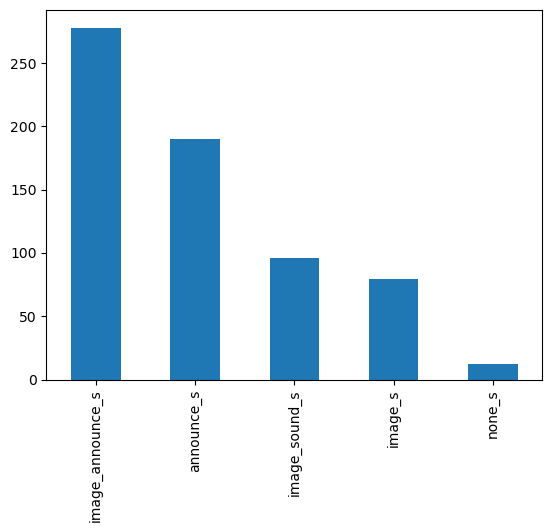

In [16]:
#'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の分布をグラフ表示（棒グラフ）縦軸がカウント数
df_all_s_drop_max.value_counts().plot(kind='bar')

In [17]:
#df_all_equal
#df[['equal_combinations']]の値がある行を削除
df_all_drop = df_all.drop(index=df_all[df_all_s['max_count'] != 1].index)
df_all_drop = df_all_drop[['d1', 'd2', 'd3', 'd4', 'd5', 'w1', 'w2', 'w3', 'w4',
       'w5', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'p', 'none_s', 'image_s',
       'announce_s', 'image_sound_s', 'image_announce_s']]
#df_all_s_dropの行数を確認
print(df_all_drop.shape)
df_all_drop

(655, 22)


,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c3,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s
0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,14.88221,...,29,21,10,6,3,1.5833,3.2333,3.8000,3.7500,3.6667
2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,14.87523,...,18,16,18,15,4,2.2000,2.2000,2.5167,2.4333,3.5500
3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,11.67031,...,28,16,17,11,4,1.8333,3.5667,4.1000,3.6833,4.0167
4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,19.50599,...,23,24,24,23,5,1.0000,4.1167,4.4500,4.0167,4.8667
5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,9.89196,...,16,11,22,22,3,2.2000,3.7667,3.2167,2.5333,3.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,7.0463,-1.1722,4.3281,2.71297,7.12817,20.17931,10.61594,10.69781,8.36414,10.69241,...,26,31,21,13,5,1.8833,2.6167,4.0500,2.2333,3.4167
797,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,16.81861,12.86248,...,30,14,14,10,5,2.3000,3.2667,4.0500,3.4500,4.0000
798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,11.08910,...,36,13,21,29,2,2.8667,2.7333,2.8833,2.8000,2.8167
800,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,10.39065,...,33,18,24,10,4,2.2000,4.0833,4.3333,3.5833,4.0500


In [18]:
#df_all_dropについて，'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の中で値が一番大きいものを抽出
df_all_drop_max = df_all_drop[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']].idxmax(axis=1)
#df_all_drop_maxのカラムを追加
df_all_drop['max'] = df_all_drop_max
#df_all_maxの値ごとにクラス分け
df_all_drop['max1'] = df_all_drop['max'].map({'none_s': 0, 'image_s': 1, 'announce_s': 2, 'image_sound_s': 3, 'image_announce_s': 4})
#df_all_dropの行数を確認
df_all_drop

,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,max,max1
0,6.2937,1.9398,6.7618,3.07992,5.72156,36.96507,25.87807,21.29791,21.00362,14.88221,...,10,6,3,1.5833,3.2333,3.8000,3.7500,3.6667,announce_s,2
2,7.1932,2.1034,4.9684,5.66562,8.38533,29.94836,20.88529,19.59672,20.50303,14.87523,...,18,15,4,2.2000,2.2000,2.5167,2.4333,3.5500,image_announce_s,4
3,7.8981,-0.9757,4.2858,3.84009,4.87743,26.87720,18.93591,16.00807,17.58007,11.67031,...,17,11,4,1.8333,3.5667,4.1000,3.6833,4.0167,announce_s,2
4,9.7256,0.0349,7.1680,3.90703,6.30194,43.20713,28.51156,24.68393,25.27235,19.50599,...,24,23,5,1.0000,4.1167,4.4500,4.0167,4.8667,image_announce_s,4
5,4.9113,1.4880,3.0357,4.70687,6.26354,26.34567,23.30003,23.58674,17.89807,9.89196,...,22,22,3,2.2000,3.7667,3.2167,2.5333,3.8833,image_announce_s,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,7.0463,-1.1722,4.3281,2.71297,7.12817,20.17931,10.61594,10.69781,8.36414,10.69241,...,21,13,5,1.8833,2.6167,4.0500,2.2333,3.4167,announce_s,2
797,8.5748,-1.1702,4.7669,4.87733,7.84963,27.71802,19.01448,16.56406,16.81861,12.86248,...,14,10,5,2.3000,3.2667,4.0500,3.4500,4.0000,announce_s,2
798,10.2154,-1.1652,5.1767,2.77794,4.07748,21.64954,14.42384,14.39132,14.72991,11.08910,...,21,29,2,2.8667,2.7333,2.8833,2.8000,2.8167,announce_s,2
800,5.6149,-0.7314,1.6795,3.74132,5.60217,29.58012,15.73032,14.89273,16.04473,10.39065,...,24,10,4,2.2000,4.0833,4.3333,3.5833,4.0500,announce_s,2


In [19]:
#各クラスごとに'none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s'の値の平均値を計算
df_all_drop_g_max_mean = df_all_drop.groupby('max').mean()
df_all_drop_g_max_mean

,d1,d2,d3,d4,d5,w1,w2,w3,w4,w5,...,c4,c5,c6,p,none_s,image_s,announce_s,image_sound_s,image_announce_s,max1
max,,,,,,,,,,,,,,,,,,,,,
announce_s,6.318965,0.397572,4.526438,3.683838,5.666668,28.162611,18.982385,16.374977,16.996507,11.881798,...,21.147368,17.305263,12.842105,3.989474,2.294556,3.407628,4.013247,3.322895,3.702196,2.0
image_announce_s,6.195527,0.363598,4.347073,3.631444,5.586503,27.772029,18.922886,16.284258,16.811566,11.841840,...,21.687050,17.589928,13.464029,4.007194,2.257433,3.399221,3.568882,3.317685,4.006896,4.0
image_s,6.199278,0.676051,4.666300,3.800014,5.860406,27.041062,18.271111,15.605420,16.444145,11.374893,...,21.063291,16.265823,12.607595,3.835443,2.422156,3.959073,3.575951,3.511820,3.612447,1.0
image_sound_s,6.191821,0.601264,4.621299,3.716158,5.730199,26.653303,18.120960,16.042877,16.076261,11.402048,...,21.760417,17.437500,13.468750,3.729167,2.282291,3.515100,3.553124,3.960764,3.580039,3.0
none_s,5.661275,1.609925,4.207583,4.308330,6.044239,25.533357,17.335871,15.742257,16.410897,10.813912,...,19.750000,18.583333,15.333333,4.083333,3.277783,2.880550,2.854167,2.900000,2.969458,0.0


In [20]:
#各クラスごとに主観評価値の平均値を算出
df_all_drop_g_max_mean_max_s = df_all_drop_g_max_mean[['none_s', 'image_s','announce_s', 'image_sound_s', 'image_announce_s']]
df_all_drop_g_max_mean_max_s.max(axis=1)

max
announce_s          4.013247
image_announce_s    4.006896
image_s             3.959073
image_sound_s       3.960764
none_s              3.277783
dtype: float64

In [21]:
#excelファイルに書き出し
df_all_drop_exp = df_all_drop.drop(columns=['max', 'max1'])
df_all_drop_exp
df_all_drop_exp.to_excel('all_exclude_s4s6_drop_exp.xlsx')

In [22]:
#csvファイルに書き出し
df_all_drop_exp.to_csv('all_exclude_s4s6_drop_exp.csv')